# 1. Importing packages

In [1]:
from codedetails import *

%load_ext autoreload
%autoreload 2

# 2. Load pretrained model: _Inception_V3_

In [2]:
load_pretrained_model_from_disk(slim_home_dir)

INFO:tensorflow:Restoring parameters from .\tf-models\slim\pretrained\inception_v3.ckpt


# 3. Load the test data (Image) and preprocess (decode) it

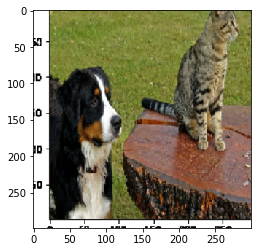

In [3]:
# You can edit the location and filename of the input test image here
relativePathtoImageFile, imageFilename = '.', 'dogs.png'
image = transform_img_fn(relativePathtoImageFile, imageFilename)

# Display test Image
displayImage (image)

# 4. Get predictions by trained model on test data 

In [4]:
get_prediction_for(image, top=5)


286 Egyptian cat 0.0020244487
239 Greater Swiss Mountain dog 0.019685516
241 Appenzeller 0.033322193
242 EntleBucher 0.03632724
240 Bernese mountain dog 0.73193145


# 5. Using LIME to test the model performance (i.e., generate explanations)

In [5]:
## LIME for image classsifier
from lime import lime_image
from skimage.segmentation import mark_boundaries

### 5.1  Examine what parts of the image are supporting or opposing the predicted outcome (i.e., Bernese mountain dog)

In [6]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)

### 5.2  Top 5 superpixels closest to the class with rest of the image hidden

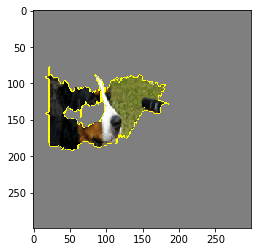

In [7]:
temp, mask = explanation.get_image_and_mask(
    240, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.show()

#### 5.2.1 .... with rest of the image present

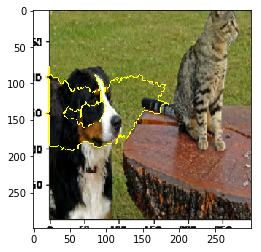

In [8]:
temp, mask = explanation.get_image_and_mask(
    240, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.show()

#### 5.2.2 We can also see the 'pros and cons' (pros=green, cons=red)

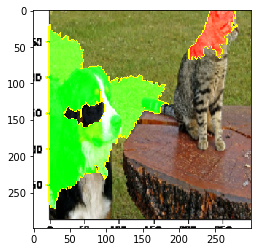

In [9]:
temp, mask = explanation.get_image_and_mask(
    240, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.show()

#### 5.2.3 Or the pros and cons that have weight at least 0.1

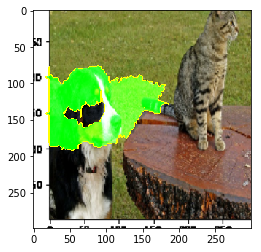

In [10]:
temp, mask = explanation.get_image_and_mask(
    240, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.show()

#### 5.2.4 Most positive towards egyptian cat:

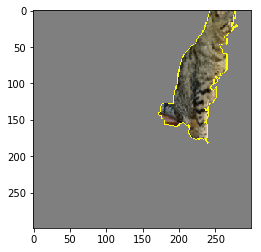

In [11]:
temp, mask = explanation.get_image_and_mask(
    286, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.show()

#### 5.2.5 pros and cons for egyptian cat

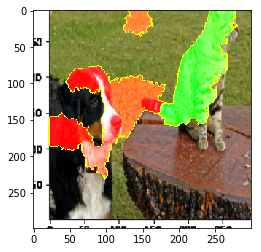

In [12]:
temp, mask = explanation.get_image_and_mask(
    286, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.show()